In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 4.0 sec. Average model step in 0.0331 ms.


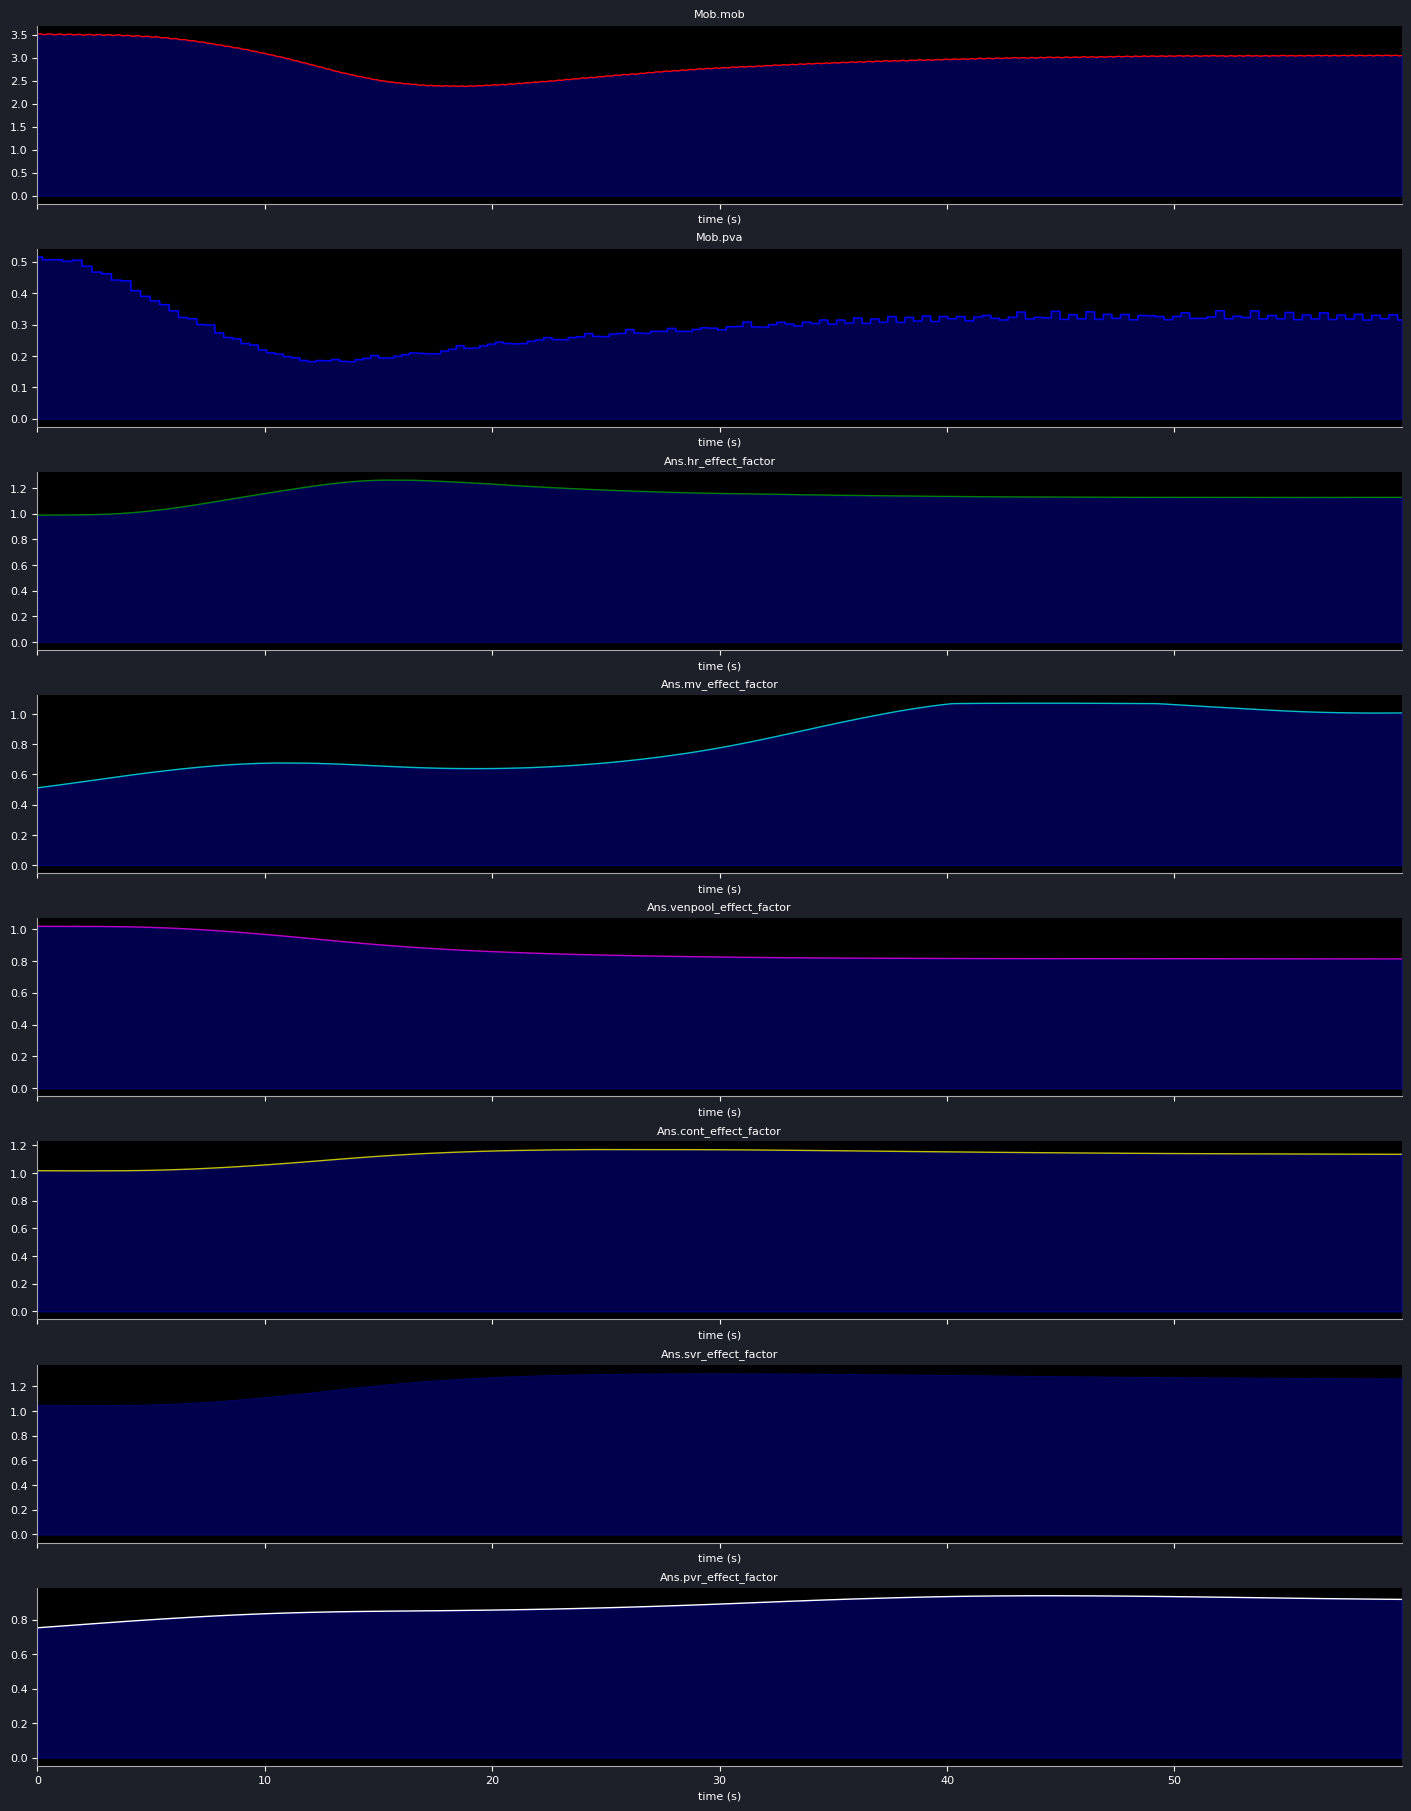


Mob.mob         : max    3.51784 min    2.37118
Mob.pva         : max    0.51549 min    0.18163
Ans.hr_effect_factor: max    1.26147 min    0.98752
Ans.mv_effect_factor: max    1.07186 min    0.51158
Ans.venpool_effect_factor: max    1.01706 min    0.81244
Ans.cont_effect_factor: max    1.16883 min    1.01434
Ans.svr_effect_factor: max    1.31255 min    1.05517
Ans.pvr_effect_factor: max     0.9381 min    0.75264


In [2]:
models["Fluids"].remove_volume(vol=75, in_time=10)
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["Mob.mob","Mob.pva", "Ans.hr_effect_factor", "Ans.mv_effect_factor", "Ans.venpool_effect_factor", "Ans.cont_effect_factor", "Ans.svr_effect_factor", "Ans.pvr_effect_factor"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [3]:
neo.fastforward(120)
neo.get_vitals()

 Ready in 6.3 sec. Average model step in 0.0261 ms.

AA.pres_in      : max   64.23467, min   44.35817 mmHg
PA.pres_in      : max   35.24304, min   19.27802 mmHg
IVCI.pres_in    : max    7.76534, min    4.35435 mmHg


{'heartrate': 156.95748891894308,
 'spo2_pre': 97.85949662583458,
 'spo2_post': 97.50911323388463,
 'abp_systole': 64.23467,
 'abp_diastole': 44.35817,
 'pap_systole': 35.24304,
 'pap_diastole': 19.27802,
 'cvp': 5.491232967,
 'resp_rate': 40.75230077693754,
 'pH': 7.400349475696686,
 'po2': 98.64044122548461,
 'pco2': 42.38667612841217,
 'hco3': 25.95927823574514,
 'be': 0.7086140339657616}

In [11]:
neo.analyze_heart()


LA_LV.flow      : net  236.74596, forward  236.74596, backward        0.0 ml/kg/min, stroke volume:    1.70319 ml/kg, 
RA_RV.flow      : net   236.6803, forward   236.6803, backward        0.0 ml/kg/min, stroke volume:    1.70272 ml/kg, 
RV_PA.flow      : net  235.71416, forward  235.71416, backward        0.0 ml/kg/min, stroke volume:    1.69577 ml/kg, 
LV_AA.flow      : net  235.86783, forward  235.86783, backward        0.0 ml/kg/min, stroke volume:    1.69688 ml/kg, 
IVCI_RA.flow    : net   130.3784, forward  137.10013, backward   -6.72173 ml/kg/min, stroke volume:    0.93797 ml/kg, 
SVC_RA.flow     : net  103.26936, forward  110.14204, backward   -6.87268 ml/kg/min, stroke volume:    0.74294 ml/kg, 
LA.pres_in      : max   10.56011, min    3.15155 mmHg
RA.pres_in      : max   10.56185, min    2.71012 mmHg
LV.pres_in      : max    75.7893, min    2.45403 mmHg
RV.pres_in      : max    44.1838, min    1.42458 mmHg
AA.pres_in      : max   75.46266, min   49.23759 mmHg
IVCI.pres_in   